# Part I - Prosper Loan Data
## by Halima Nasula Merenga 

## Introduction
> In this section I shall proceed to conduct an exploratory data analysis on Loan Data provided by Prosper Marketplace, Inc. which is a San Francisco, California-based company in the peer-to-peer lending industry. I will use Univariate, Bivariate and Multivariate visualizations to explore patterns in the data.  
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loandata=pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loandata.shape)
print(loandata.dtypes)
print(loandata.head(5))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Reducing Columns

> There are very many columns and I will not use them all, so I will use LOC to retrieve only a given number of columns that I will require to answer questions relating to factors affecting APR and Loan Status, which is easier than dropping individual columns

In [5]:
# filter the dataframe and give it a new name
df_loans = loandata.loc[:, [ 'Term', 'LoanStatus', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                         'DebtToIncomeRatio','IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment','Investors']]

In [6]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
Lo

### Removing Duplicates

>Let us proceed to remove any duplicate data

In [7]:
#checking for total number of rows with duplicate values
df_loans.duplicated().sum()

871

In [8]:
#removing duplicate data
df_loans.drop_duplicates(inplace=True)

In [9]:
#confirming no duplicate data is remaining 
df_loans.duplicated().sum()

0

### Null values

> let's count the number of null values for each variable

In [10]:
#null values count per variable
df_loans.isnull().sum()

Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3529
EmploymentStatus             2255
EmploymentStatusDuration     7625
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
DebtToIncomeRatio            8472
IncomeRange                     0
IncomeVerifiable                0
StatedMonthlyIncome             0
LoanOriginalAmount              0
LoanOriginationDate             0
MonthlyLoanPayment              0
Investors                       0
dtype: int64

In [11]:
#removing null data 

df_loans=df_loans.dropna()

In [12]:
#confirming no values are left 
df_loans.isnull().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

### Combining columns

>The credit score ranges , upper and lower, can be combined as given by general score ratings provided by most credit companies. 
>A score of 720 or higher is generally considered excellent credit.
>A score between 690 and 719 is considered good credit.
>Scores between 630 and 689 are fair credit.
>Scores of 629 or below are poor credit.

In [13]:
#checking our credit score shape
df_loans.query('CreditScoreRangeLower < 300').shape[0],df_loans.query('CreditScoreRangeUpper < 549').shape[0]

(0, 981)

In [14]:
#checking our credit score shape
df_loans.query('CreditScoreRangeLower > 750').shape[0],df_loans.query('CreditScoreRangeUpper > 900').shape[0]

(13803, 0)

In [15]:
#credit score function
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

In [16]:
#applying credit function
df_loans['CreditScore'] = df_loans['CreditScoreRangeLower'].apply(Credit_score)

In [17]:
# Drop the redundant columns
cols = ['CreditScoreRangeLower','CreditScoreRangeUpper']
df_loans.drop(columns=cols , axis=1 , inplace=True)

In [18]:
#testing code
df_loans.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,CreditScore
0,36,Completed,0.16516,0.1580,0.1380,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00,330.43,258,Fair
1,36,Current,0.12016,0.0920,0.0820,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00,318.93,1,Good
3,36,Current,0.12528,0.0974,0.0874,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00,321.45,158,Excellent
4,36,Current,0.24614,0.2085,0.1985,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00,563.97,20,Good
5,60,Current,0.15425,0.1314,0.1214,1,NM,Professional,Employed,82.0,0.36,"$100,000+",True,8333.333333,15000,2013-12-24 00:00:00,342.37,1,Good


#### Changing Listing Category values 

> We can change the numeric Listing Category values to categorical string values for easier interpretation 

In [19]:
#Changing listing category numeric values to string
df_loans.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

In [20]:
#Renaming Listing Category column 
df_loans.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

In [21]:
#code testing
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94114 entries, 0 to 113936
Data columns (total 19 columns):
Term                        94114 non-null int64
LoanStatus                  94114 non-null object
BorrowerAPR                 94114 non-null float64
BorrowerRate                94114 non-null float64
LenderYield                 94114 non-null float64
ListingCategory             94114 non-null object
BorrowerState               94114 non-null object
Occupation                  94114 non-null object
EmploymentStatus            94114 non-null object
EmploymentStatusDuration    94114 non-null float64
DebtToIncomeRatio           94114 non-null float64
IncomeRange                 94114 non-null object
IncomeVerifiable            94114 non-null bool
StatedMonthlyIncome         94114 non-null float64
LoanOriginalAmount          94114 non-null int64
LoanOriginationDate         94114 non-null object
MonthlyLoanPayment          94114 non-null float64
Investors                   94114 non

#### Changing Loan Term values to String 

> We can change the loan terms to categorical string values for easier understanding 

In [22]:
#checking values in Loan Term 
df_loans.Term.value_counts()

36    70096
60    22603
12     1415
Name: Term, dtype: int64

In [23]:
#replacing the 3 value counts with string 
df_loans.replace(to_replace={"Term": {12: "Short", 36: "Intermediate", 60: "Long"}}, inplace=True)

In [24]:
#testing code 
df_loans.Term.value_counts()

Intermediate    70096
Long            22603
Short            1415
Name: Term, dtype: int64

In [25]:
df_loans.CreditScore.value_counts()

Good         60911
Fair         17802
Excellent    13803
Poor          1598
Name: CreditScore, dtype: int64

### Changing Data Types 

In [26]:
#changing Loan Origination Date to a datetime datatype 
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])

In [27]:
# Convert Credit Score, IncomeRange and Term to ordinal categorical
ordinal_var_dict = {'Term': ['Short','Intermediate','Long'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'], 
                    'CreditScore': ['Poor','Fair','Good', 'Excellent']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

In [28]:
#converting other desired string values to categorical 
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory'] = df_loans['ListingCategory'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')

In [29]:
#testing code
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94114 entries, 0 to 113936
Data columns (total 19 columns):
Term                        94114 non-null category
LoanStatus                  94114 non-null category
BorrowerAPR                 94114 non-null float64
BorrowerRate                94114 non-null float64
LenderYield                 94114 non-null float64
ListingCategory             94114 non-null category
BorrowerState               94114 non-null category
Occupation                  94114 non-null category
EmploymentStatus            94114 non-null category
EmploymentStatusDuration    94114 non-null float64
DebtToIncomeRatio           94114 non-null float64
IncomeRange                 93957 non-null category
IncomeVerifiable            94114 non-null bool
StatedMonthlyIncome         94114 non-null float64
LoanOriginalAmount          94114 non-null int64
LoanOriginationDate         94114 non-null datetime64[ns]
MonthlyLoanPayment          94114 non-null float64
Investors     

In [30]:
#rechecking the structure 
df_loans.shape

(94114, 19)

### What is the structure of your dataset?

> The dataset is made up of 94,114 rows and 19 columns. There are a number of datatypes including integer , string, category (nominal and ordinal), datetime, boolean and float. 

### What is/are the main feature(s) of interest in your dataset?

> The feature of interest is BorrowerAPR  , specifically, what factors will influence the APR 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Credit score, Loan Term , Employment Status will show a correlation with APR 

## Univariate Exploration



#### What is the distribution of the loan status ?

We can visualize loan status distribution by using seaborn's countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

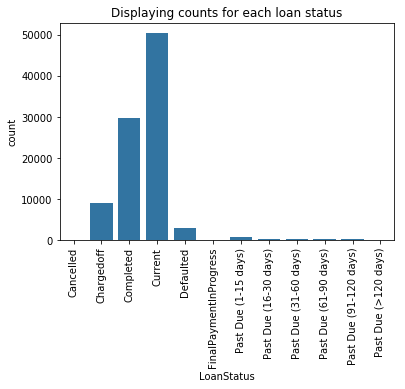

In [31]:
#loan status bar chart 
base_color = sb.color_palette()[0]
sb.countplot(x='LoanStatus',data = df_loans, color=base_color)
plt.title('Displaying counts for each loan status');
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 15,4
plt.xticks(rotation=90)

> Current loans have the highest count followed by the completed loans

#### What is the distribution of the loan terms ? 
We will use seaborn's countplot to visualize the loan terms categories 

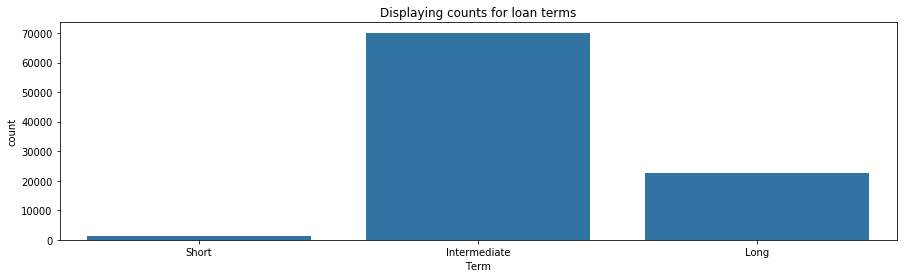

In [32]:
#loan term countplot
sb.countplot(x='Term',data = df_loans, color=base_color)
plt.title('Displaying counts for loan terms');
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 4,3


> The maximum count goes to the intermediate term loan that takes 36 months, equivalent to 3 years. Most of the loans taken are intermediate term loans 

#### What is the distribution of the Listing Category ? 
We will use Seaborn countplot to visualize the loan purpose (Listing Category) distribution 

Text(0.5,1,'LOAN PURPOSE DISTRIBUTION')

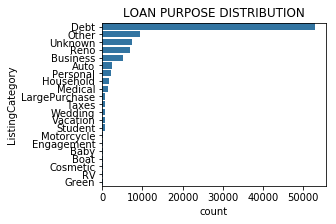

In [33]:
sb.countplot(y='ListingCategory',data = df_loans, color=base_color, order=df_loans['ListingCategory'].value_counts().index)
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 20,15

plt.title('LOAN PURPOSE DISTRIBUTION')

The maximum count observed above is debt consolidation meaning most of the loans are used to reduce existing debts 

#### What is the distribution of the Employment Status Categories ? 
We will use Seaborn countplot to visualize the Employment Status distribution 

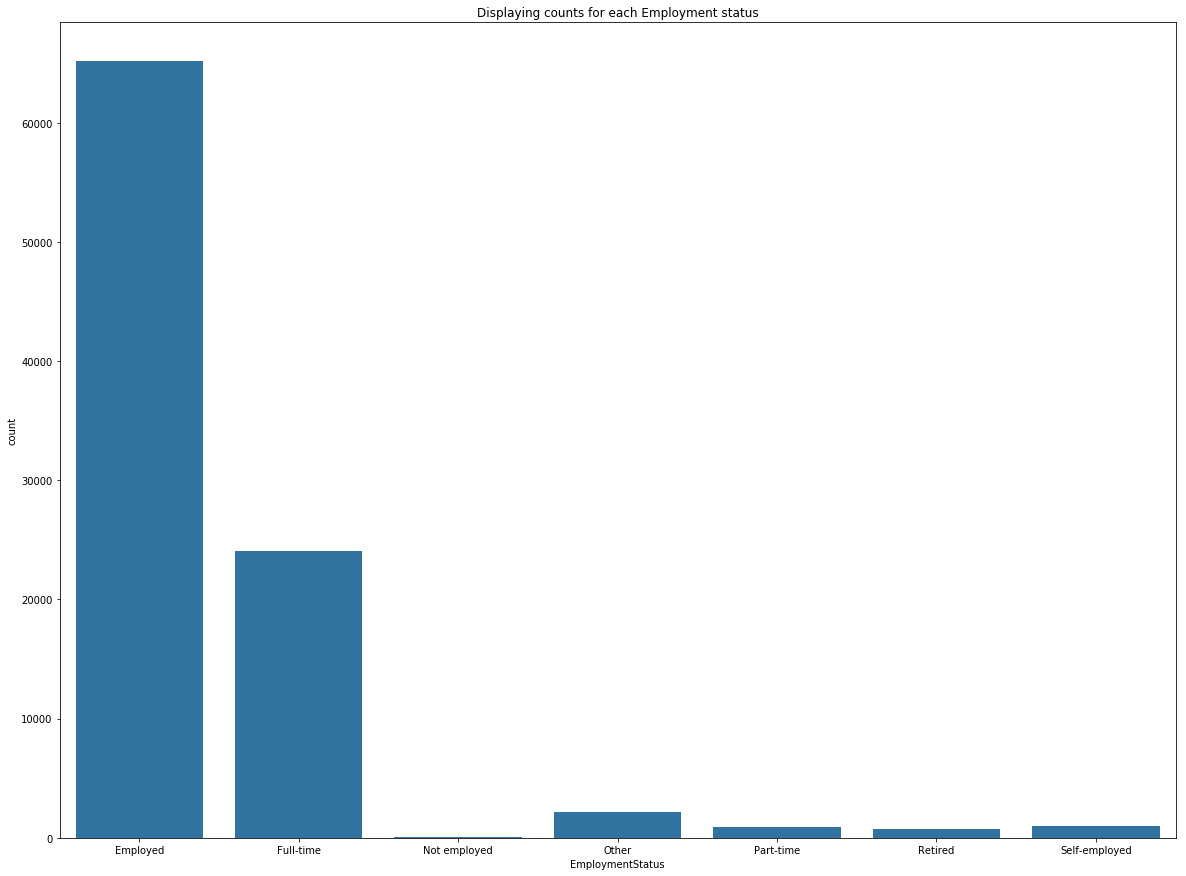

In [34]:
sb.countplot(x='EmploymentStatus',data = df_loans, color=base_color)
plt.title('Displaying counts for each Employment status');
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,4

> As seen above, most of the borrowers are employed, closely followed by those of full time status 

#### What is the distribution of the Income Range Categories ? 
We will use Seaborn countplot to visualize the Income Range distribution

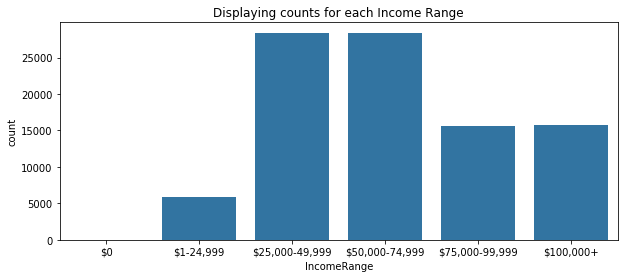

In [35]:
sb.countplot(x='IncomeRange',data = df_loans, color=base_color)
plt.title('Displaying counts for each Income Range');
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 22,6

> From the above diagram we can see that most borrowers have an Income of range 25,000-49,999 dollars which is followed up close with 50,000-74,999 dollars range while the lowest are those of the range 1-24,999 dollars 

In [36]:
#confirming results
df_loans.IncomeRange.value_counts()

$25,000-49,999    28405
$50,000-74,999    28348
$100,000+         15739
$75,000-99,999    15619
$1-24,999          5846
$0                    0
Name: IncomeRange, dtype: int64

#### What is the distribution of Credit score categories? 
> We will use seaborn countplot to visualize credit score categories

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

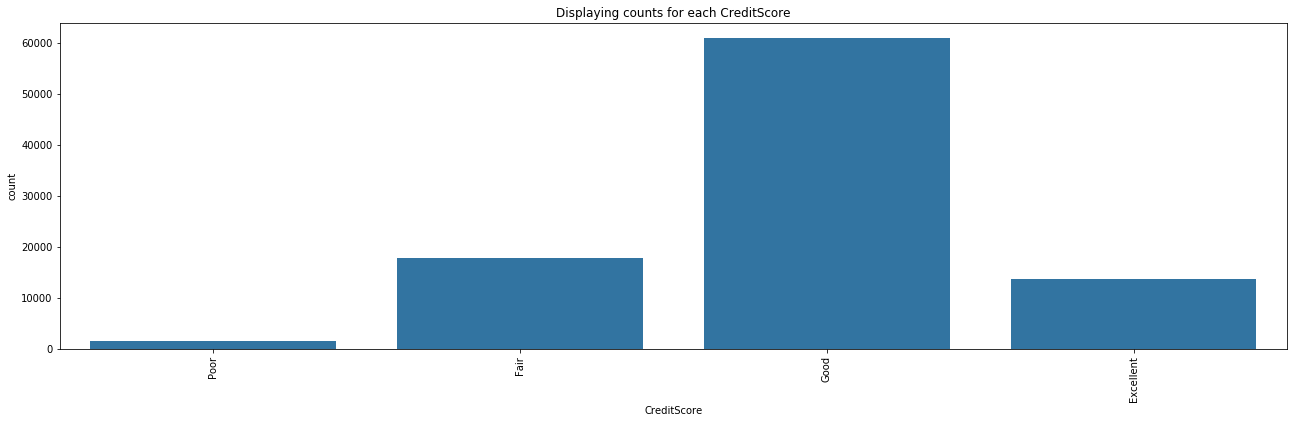

In [37]:
base_color = sb.color_palette()[0]
sb.countplot(x='CreditScore',data = df_loans, color=base_color)
plt.title('Displaying counts for each CreditScore');
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 7,4
plt.xticks(rotation=90)

> From the above bar graph we can see that most borrowers have a good credit score 

#### What is the distribution of the Original Loan Amount ? 
> we will create a Loans Origin Amount Histogram 

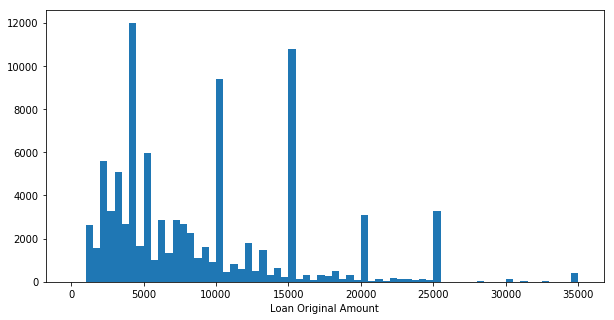

In [38]:
x_bins = np.arange(0,df_loans.LoanOriginalAmount.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=df_loans.LoanOriginalAmount,bins=x_bins);
plt.xlabel("Loan Original Amount");

> The histogram is slightly skewed to the right, the highedt count is slightly before. We can use a log scale for further analysis 

In [39]:
# Function to calculate cuberoot.
def cuberoot_trans(x, inverse = False):
    
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
# Function to calculate log.
def log_trans(z,inverse=False):

    if not inverse:

        return np.log10(z)
    else:
        return z**3

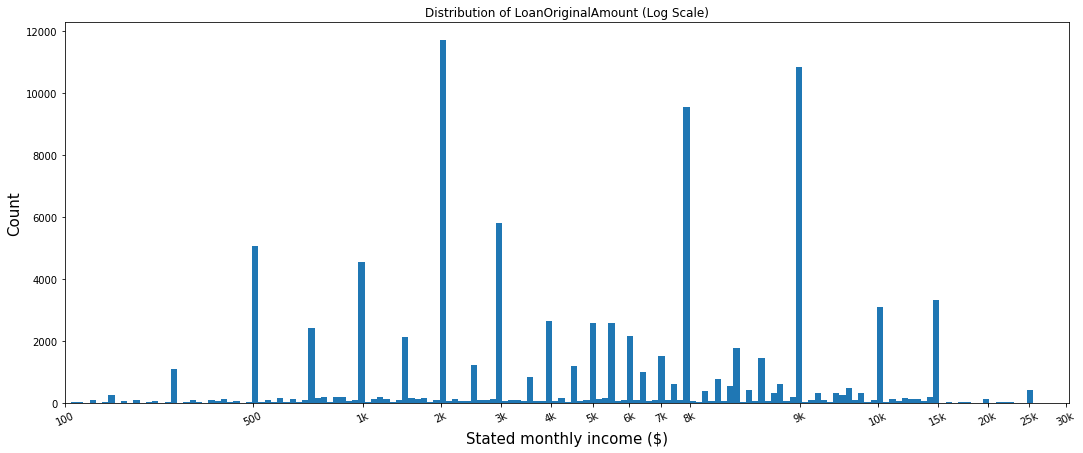

In [40]:
#use log transformation when creating stated monthly income 
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='LoanOriginalAmount',data=df_loans,bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(1000)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of LoanOriginalAmount (Log Scale)');

> From the above histogram we can see that the highest count is actually at 2000 dollars

#### what is the distribution of Borrower state? 
> We can use seaborn's countplot to visualize this

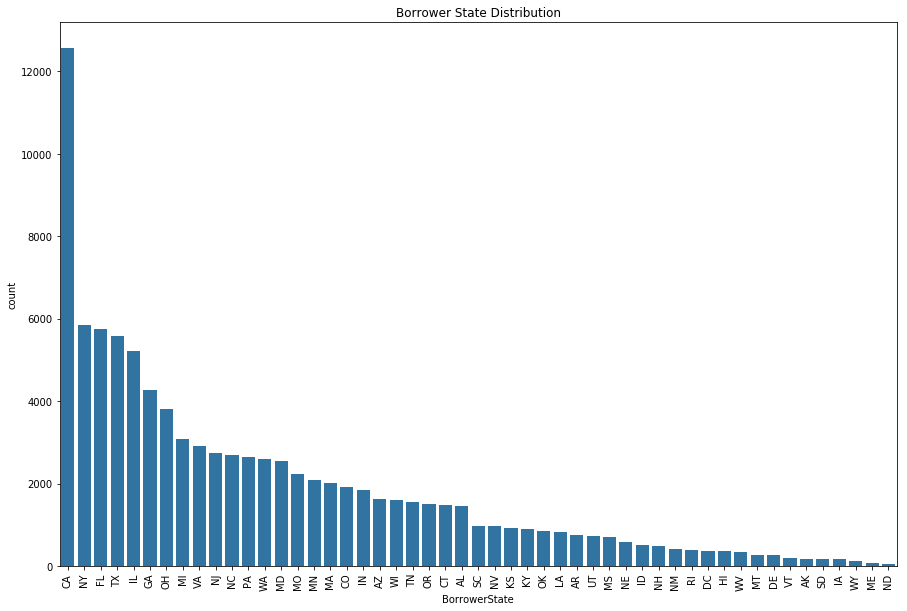

In [41]:
#Borrower State Distribution
cat_order = df_loans['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df_loans,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

> From the above diagram most borrowers are from Carlifornia state while the least borrowers are from North Dakota 

#### What are the Loan origins per year ?
> We can use seaborn's countplot again to visualize this 

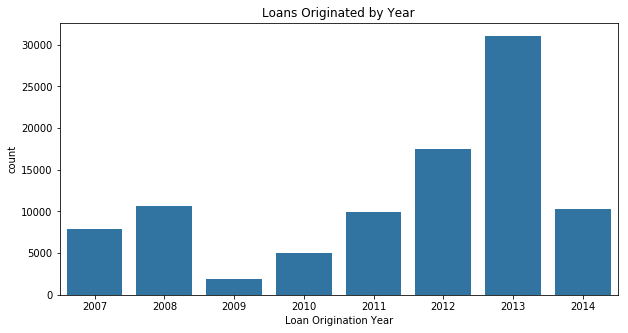

In [42]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

> Here we can observe that most loans originated in 2013 while the year with the least loan origination is 2009

#### What is the Borrowe Occupation Distribution ? 
> We can use seaborn's countplot 

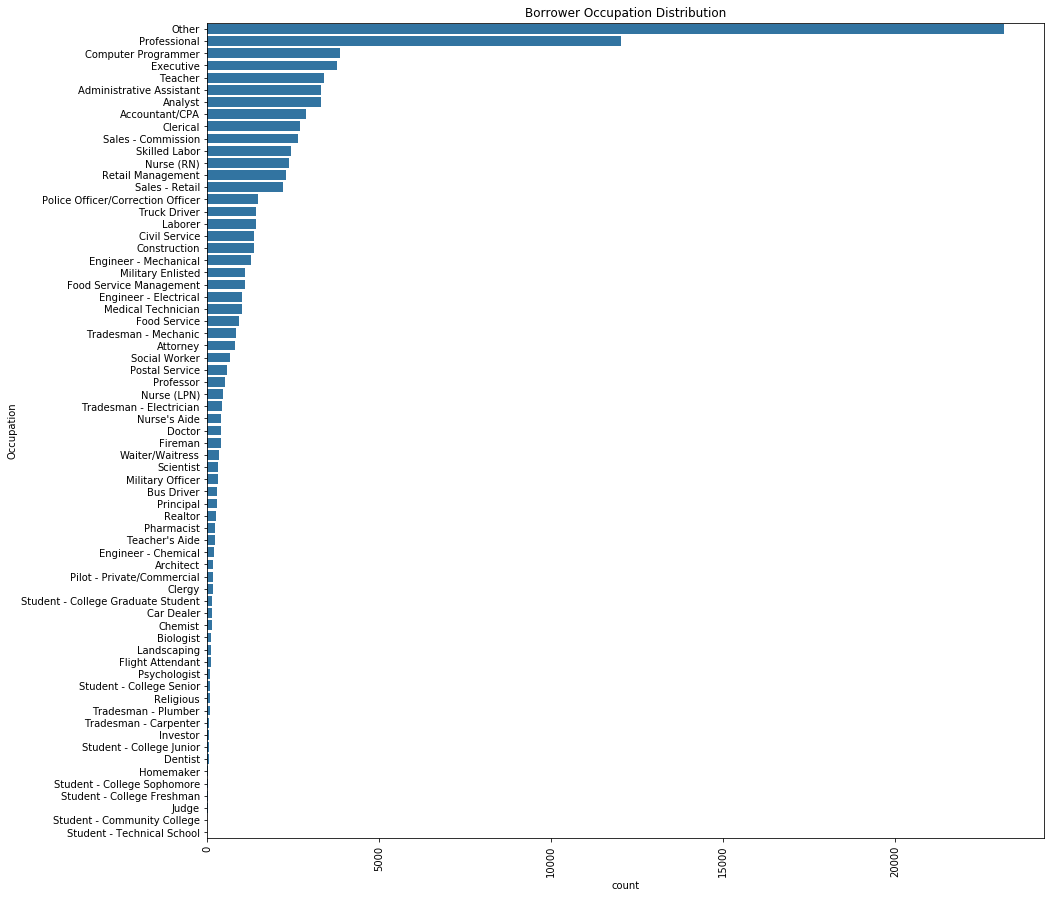

In [43]:
#Borrower Occupation Distribution
occ_order = df_loans['Occupation'].value_counts().index
plt.figure(figsize=[15, 15])
sb.countplot(data=df_loans,y='Occupation',color=base_color, order=occ_order);
plt.title('Borrower Occupation Distribution');
plt.xticks(rotation=90);

> From here we can see that students are the least borrowers while most borrowers have other occupations aside from the ones listed 

#### What is the borrower Rate Distribution? 
> We can use a histogram here

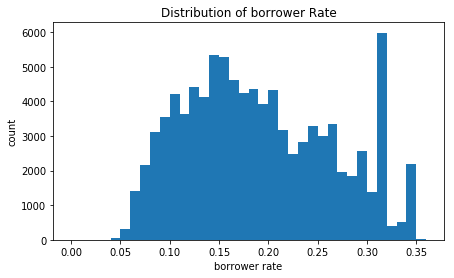

In [44]:
#plotting borrowerrate histogram 
bins = np.arange(0,df_loans['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=df_loans,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');


The histogram can be said to be bimodal with 1 peak at around 0.15 and the other at around 0.32. It is right skewed with a sudden steep increase at around 0.32

### What is the BorrowerAPR distribution? 
> Let us also use a histogram here

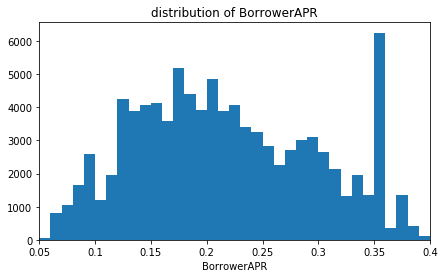

In [45]:
#Plotting BorrowerAPR distribution 
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35, 0.4]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='BorrowerAPR',data=df_loans,bins=bins)
plt.xlabel('BorrowerAPR')
#plt.xscale('log');
plt.xticks(np.array(tick),labels)
plt.xlim(0.05,0.4)
plt.title('distribution of BorrowerAPR');

> the histogram is bimodal and slightly skewed to to the right with its 2 peaks at approximately 0.17 and 0.36

#### What is the distribution of the stated monthly income ? 
> We shall plot a histogram here

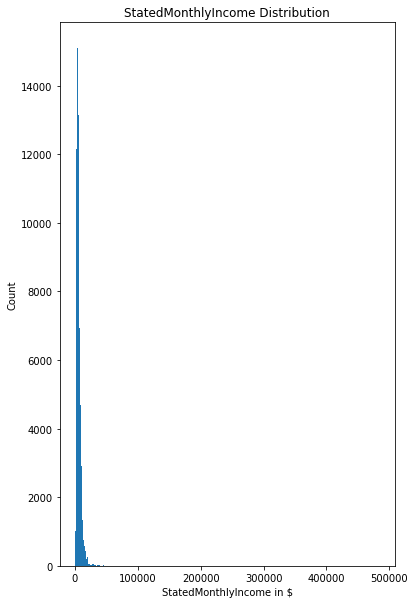

In [46]:
# Stated Monthly Income Distribution
binsize = 1000
bins = np.arange(df_loans['StatedMonthlyIncome'].min(), df_loans['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[6, 10])
plt.hist(data = df_loans, x = 'StatedMonthlyIncome', bins = bins)
plt.title('StatedMonthlyIncome Distribution')
plt.xlabel('StatedMonthlyIncome in $')
plt.ylabel('Count')
plt.show()

> The histogram above is extremely right skewed 

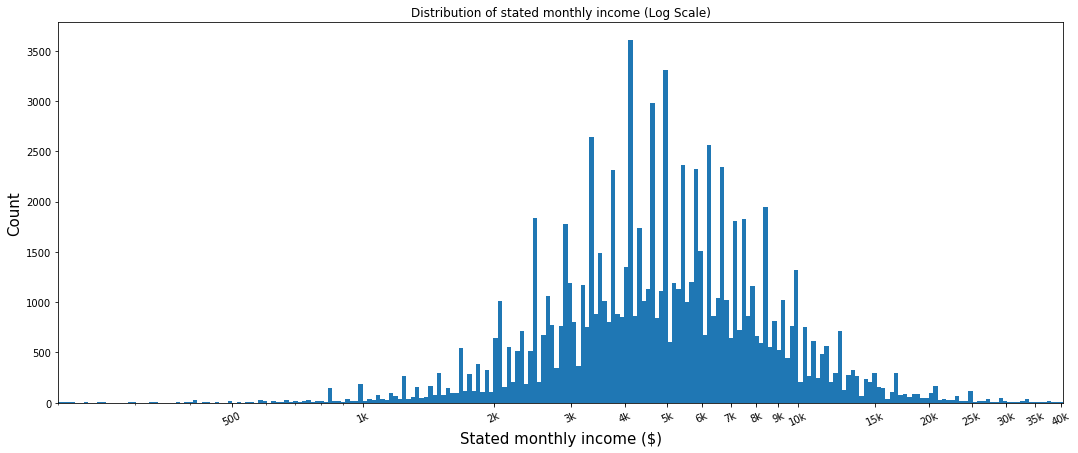

In [47]:
# Plotting histogram by scaling the x-axis to log-type, and changing the axis limit.
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=df_loans,bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([0.001,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of stated monthly income (Log Scale)');

> From the above diagram, the highest density of the data is at around 4000$

#### What is the Debt to Income Ratio ?

> let us plot the Debt To Income Ratio

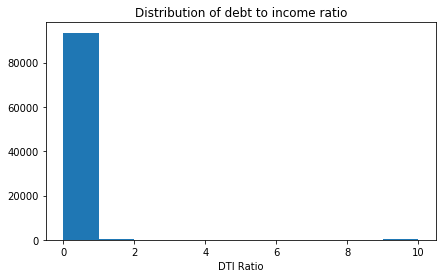

In [48]:
# Plotting histogram after removal of outliers.
plt.hist(x='DebtToIncomeRatio',data=df_loans)
plt.xlabel('DTI Ratio')
plt.title('Distribution of debt to income ratio');

> Most of the data is between  0 and 1, but due to outliers our data is mostly on one extreme side . We shall proceed to remove outlier. 

In [49]:
#make a copy of the original dataset
new_loans=df_loans.copy()

In [50]:
# Select outliers in debt to income ratio with ratio greater than 1.
outliers_dti = (new_loans['DebtToIncomeRatio']>1) 

In [51]:
out_df = new_loans.loc[outliers_dti,:]

In [52]:
#removing outlier data
filter_df = new_loans.loc[-outliers_dti,:]

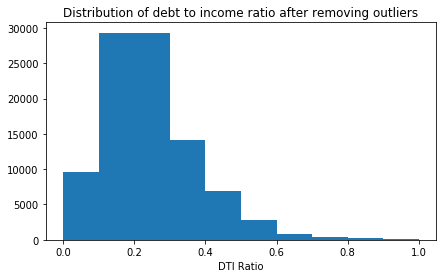

In [53]:
# Plotting histogram after removal of outliers.
plt.hist(x='DebtToIncomeRatio',data=filter_df)
plt.xlabel('DTI Ratio')
plt.title('Distribution of debt to income ratio after removing outliers');

> DebtToIncomeRatio is unimodal but  is slightly right skewed. Let's use logs to see any interesting pattern.

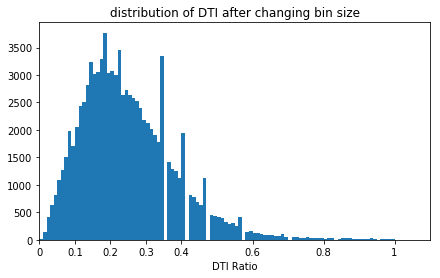

In [54]:
# Plotting a histogram with more number of bins.
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=filter_df,bins=bins)
plt.xlabel('DTI Ratio')
plt.xticks(np.array(tick),labels)
plt.xlim(0,1.1)
plt.title('distribution of DTI after changing bin size');

> Maximum DTI seems to lie between 0.15 and 0.2 which is quite good DTI. After 0.2 (between 0.22 and 0.25 their is an increase in counts of DTI ratio) count of DTI decreases with a smooth slope.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the visualizations I found that Stated Monthly Income , Debt To Income Ratio and LoanOriginal Amount had skewed histogram distributions , I therefore used log transformation to check further for patterns. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> The DebtIncomeRation histogram had a big gap on its distribution, thus I opted to remove outliers and work with the remaining data 

> To analyze the credit score I used the credit score upper range and the credit score lower range to form a new column and categorized them as used since the Credit Grade and properscore had a lot of missing values . 

## Bivariate Exploration


#### Does Credit Score Influence BorrowerRate ? 

> Let's compare BorrowerRate over the different credit scores using a violin plot and a box plot simultaneously 

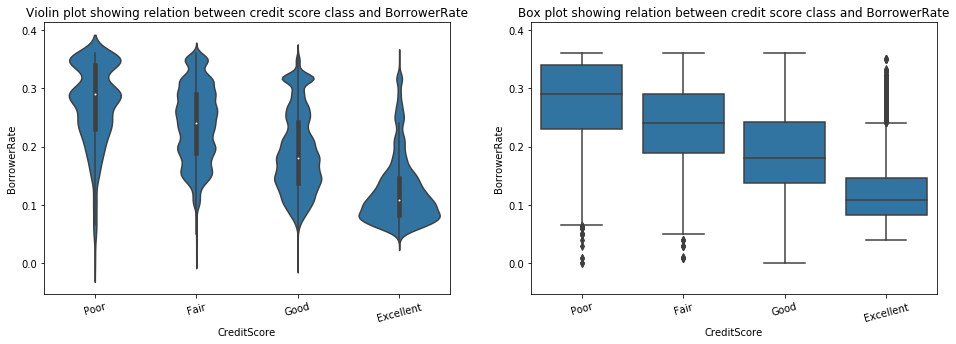

In [55]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_loans, x='CreditScore', y='BorrowerRate', color=base_color, innner=None)
plt.xticks(rotation=15);
plt.title('Violin plot showing relation between credit score class and BorrowerRate');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_loans, x='CreditScore', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis 
plt.title('Box plot showing relation between credit score class and BorrowerRate');

1. From the above above plots we can see that the Borrower Rate is higher when for those with a poor credit score with a median of slightly below 0.3 but lowest for those with an excellent credit score that has a median of about 0.14. The decline can be seen consecutively from poor to excellent.  Credit score is therefore a factor affecting Borrower Rate 

#### Does Credit Score Influence APR ? 

> Let's compare APR over the different credit scores using a violin plot and a box plot simultaneously 

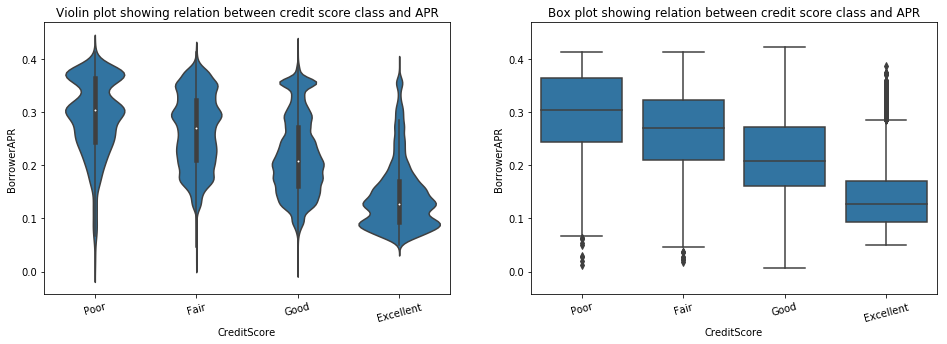

In [56]:

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_loans, x='CreditScore', y='BorrowerAPR', color=base_color, innner=None)
plt.xticks(rotation=15);
plt.title('Violin plot showing relation between credit score class and APR');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_loans, x='CreditScore', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis 
plt.title('Box plot showing relation between credit score class and APR');

1. From the above above plots we can see that the Borrower APR is higher when for those with a poor credit score with a mdeian of 0.3 but lowest for those with an excellent credit score that has a median of about 0.14. The decline can be seen consecutively from poor to excellent.  Credit score is therefore a factor affecting Borrower APR 

#### Does Loan Term Influence Borrower APR? 

> Let's compare APR over the different Loan Terms using a violin plot and a box plot simultaneously 

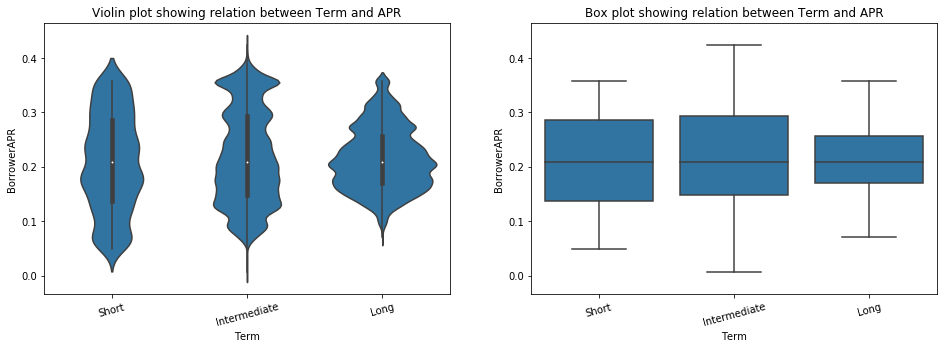

In [57]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_loans, x='Term', y='BorrowerAPR', color=base_color, innner=None)
plt.xticks(rotation=15);
plt.title('Violin plot showing relation between Term and APR');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_loans, x='Term', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis 
plt.title('Box plot showing relation between Term and APR');

1. From the violin plot, the long term loans have their density mostly on the lower part of the violin meaning, it is more likely for one to get a lower Borrower APR when the term is 60 months / Long Term 
2. The maximum and minimum Borrowe APR values are found within the Intermediate Loans ie 36 months 
3. Not much difference can be visibly seen when comparing their median values, we can proceed to check the Borrower Rate specifically as it has no extra loan charges added to the interest rate 

#### Does the Loan Term Influence Borrower Rate? 

> Let us look at the violin and box plots again using the Term vs the Borrower Rates.

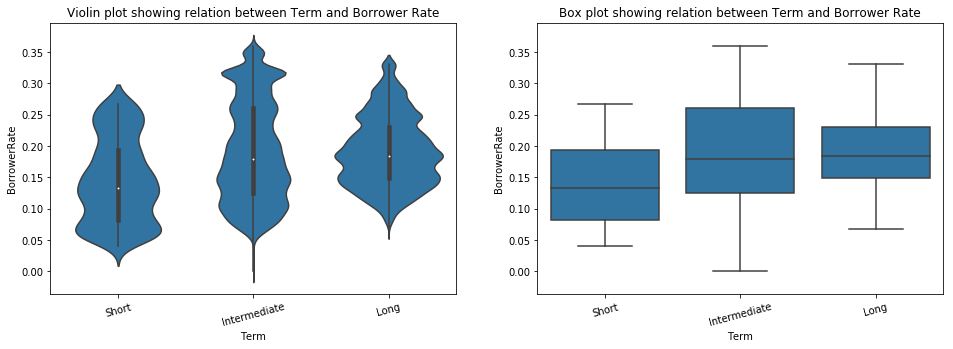

In [58]:
# LEFT plot: violin plot
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1) 
#Let's return the axes object
ax1 = sb.violinplot(data=df_loans, x='Term', y='BorrowerRate', color=base_color, innner=None)
plt.xticks(rotation=15);
plt.title('Violin plot showing relation between Term and Borrower Rate');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_loans, x='Term', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis 
plt.title('Box plot showing relation between Term and Borrower Rate');

> From the above diagram we can see that the loan interest is highest for Long Term Loans and Lowest for short term goals. This is possibly because shorter terms guarantee the lender will have their money back sooner, so there’s less risk. 

#### Does Employment Status affect Borrower APR? 

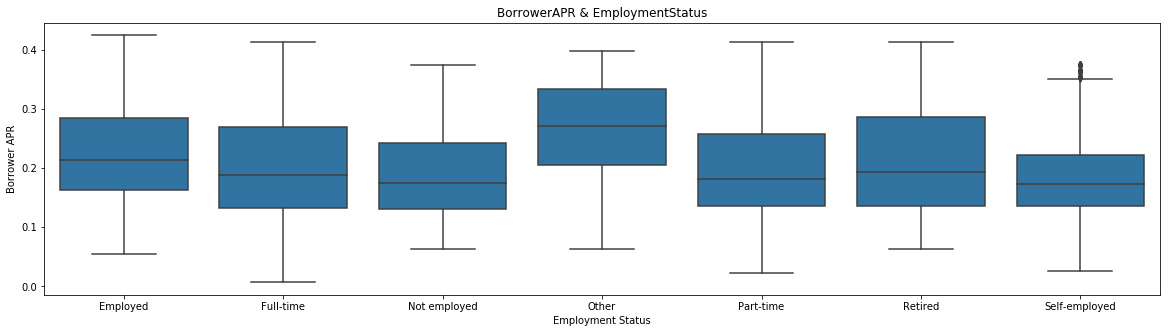

In [59]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

> From the above plot we can see the APR is highest for those whose employment status is listed under other. The APR is lowest for those whose are not employed 

#### Does Employment Status affect Borrower Rate? 

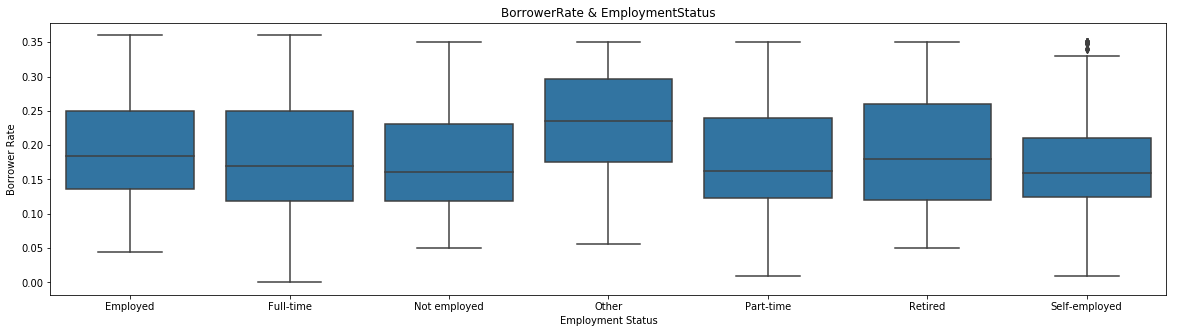

In [60]:
# Borrower Rate vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loans,y='BorrowerRate',x='EmploymentStatus',color=base_color);
plt.title('BorrowerRate & EmploymentStatus');
plt.ylabel('Borrower Rate');
plt.xlabel('Employment Status');

> From the above plot we can see the Borrower Rate is highest for those whose employment status is listed under other. The Borrower Rate is lowest for those whose are not employed 

#### Does the Borrower's state affect APR ? 

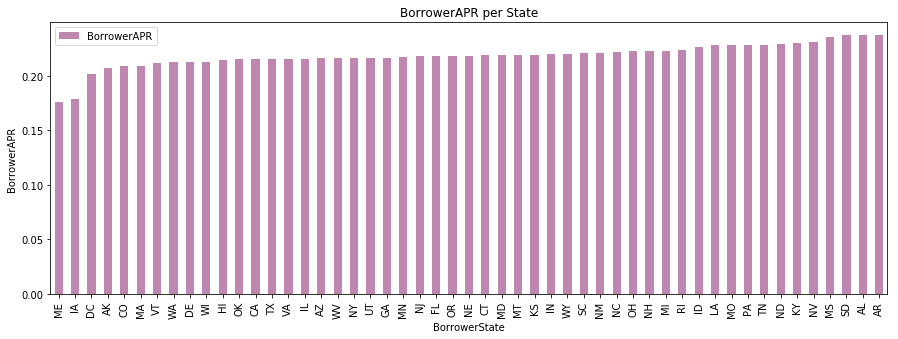

In [61]:
average_apr = df_loans.groupby('BorrowerState').mean().BorrowerAPR.sort_values()
average_apr.plot(kind='bar',  color='#BF86AF', figsize=(15,5))
plt.title('BorrowerAPR per State')
plt.ylabel('BorrowerAPR')
plt.xlabel('BorrowerState')
plt.legend(); 

> From the above Bar plot we can see that the average borrowerAPR slightly varies across different states, the lowest being in Maine state and highest being in Arizona. 

#### Does DebtToIncomeRatio Affect BorrowerAPR? 

> Lets use a scatter plot to analyze the Debt to Income Ratio and BorrowerAPR Correlation

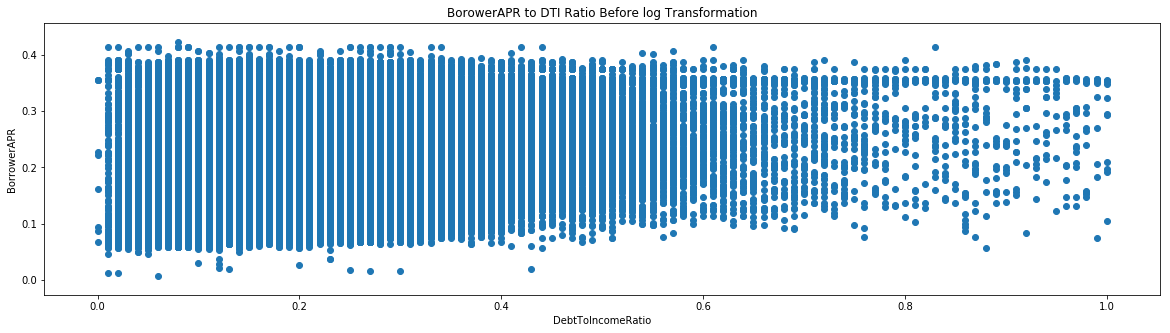

In [62]:
# Scatter plot
plt.figure(figsize = [20, 5])
plt.scatter(data = filter_df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerAPR')
plt.title('BorowerAPR to DTI Ratio Before log Transformation');

> From the scatter plot there is not much correlation , we can try use a log scale for further analysis

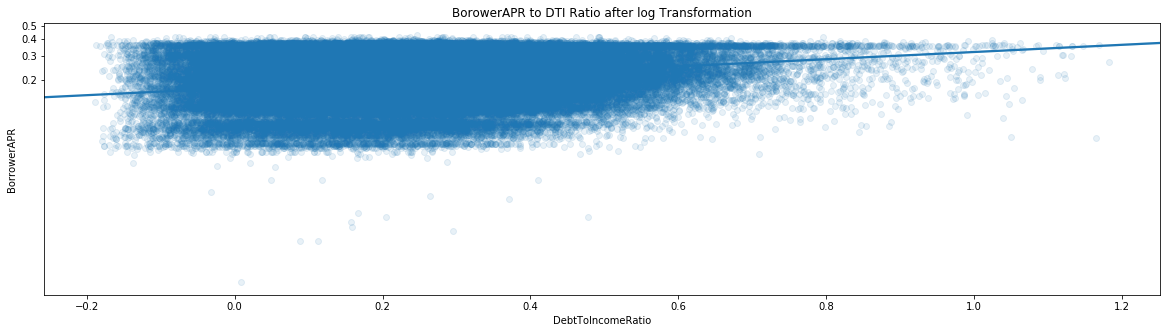

In [63]:
#scatterplot using logtransformation
plt.figure(figsize = [20, 5])
sb.regplot(filter_df['DebtToIncomeRatio'], filter_df['BorrowerAPR'].apply(log_trans), x_jitter=0.2, scatter_kws={'alpha':1/10})
tick_locs = [0.2, 0.3,0.4, 0.5]
plt.yticks(log_trans(tick_locs), tick_locs);
plt.title('BorowerAPR to DTI Ratio after log Transformation');

> From the scatterplot above we can see that there is a slight positive correlation between BorrowerAPR and DebtToIncomeRatio. 

### Is there a relationship between Employment Duration Status and Borrower Rate? 
> Let us use a heatmap to check this 

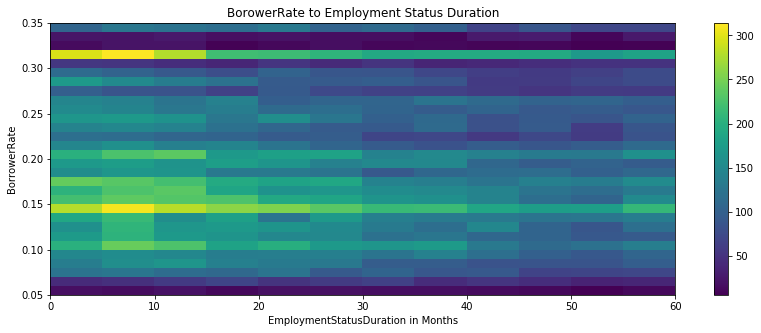

In [64]:
plt.figure(figsize = [14, 5])
bins_x = np.arange(0, 60+5, 5)
bins_y = np.arange(0.05,0.36, 0.01)
plt.hist2d(data= df_loans, x = 'EmploymentStatusDuration', y = 'BorrowerRate', cmap= 'viridis', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('EmploymentStatusDuration in Months')
plt.ylabel('BorrowerRate');
plt.title('BorowerRate to Employment Status Duration');

> Within a 5 year/60 months period we observe that for those who have been emplyed for less than 15 months, most of them get loans with high Borrowe Rate of above 0.30 . For those who have been employed for less than 30 months but mote than 15, their Borrower Rate can be seen to be mostly at 0.15 

### What is the relationship between Debt to Income Ratio and Borrower Rate? 

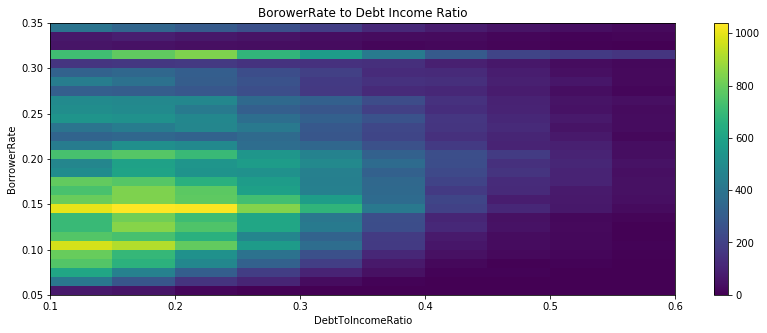

In [65]:
plt.figure(figsize = [14, 5])
bins_x = np.arange(0.1, 0.6+0.05, 0.05)
bins_y = np.arange(0.05,0.36, 0.01)
plt.hist2d(data= filter_df, x = 'DebtToIncomeRatio', y = 'BorrowerRate', cmap= 'viridis', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerRate');
plt.title('BorowerRate to Debt Income Ratio');


> From the above diagram we can see that for those whose debt to income ratio is below 0.3, the borrower rate is low. This means that if your DTI ratio is low, your loan is likely to have a low borrowerrate

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
1. Borrower APR  and BorrowerRate are inversely proportional to credit score . A higher credit score qualifies you for the lowest interest rates.
2. There is a small but significant positive correlation between DebtToIncome Ratio and BorrowAPR. The lower the DTI ratio, the lower the BorrowerAPR.
3. Borrower Rate is higher for Long Term loans and shortest in short term loans. Typically, the longer the loan term, the higher the interest rate will be (but not always). That’s because shorter terms guarantee the lender will have their money back sooner, so there’s less risk.
4. Employment status duration is inversely proportional to the BorrowerRate. Loan Lenders may look at your employment duration to determine if you are a high risk
5. A lower debt to income ratio is likely to have a lower borrowerRate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. The BorrowerAPR and the LoanTerm have little correlation yet the borrowerRate and the LoanTerm have a significant Correlation. It would be logical for the former to have some significant correlation as well. 

## Multivariate Exploration


#### Is there any correlation between the different variables ? 

> We will use a heatmap to analyze the correlation between different numeric variables as shown below

In [66]:
num_variables = [ 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EmploymentStatusDuration', 'DebtToIncomeRatio',
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment','Investors',
                    ]

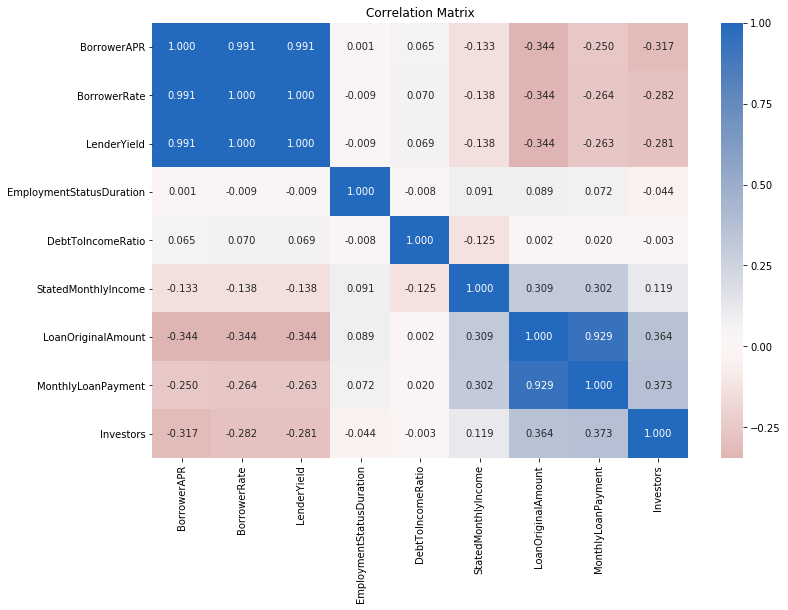

In [67]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_loans[num_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

> We can see that there is a strong positive correlation between BorrowerAPR and BorrowerRate, Lender Yield and Borrower Rate and Monthly Loan Payment and Loan Original Amount 

#### How does BorrowRate vary when comparing it to credit score in each loan term ? 

> Using a A dodged point graph we can look at the relationship between BorrowRate, credit score and loan term 

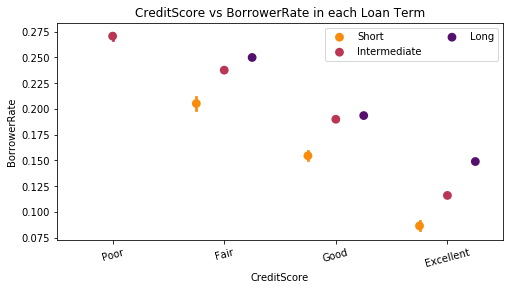

In [68]:
# Creditscore vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [8,4])
ax = sb.pointplot(data = df_loans, x = 'CreditScore', y = 'BorrowerRate', hue = 'Term', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('CreditScore vs BorrowerRate in each Loan Term')
plt.ylabel('BorrowerRate')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

> From the graph above we can see across all credit score groups, the Long term loans have the highest BorrowerRate  while the BorrowerRate is lowest in each credit score group when the loan term is short

### How does Loan Status vary compared to Loan Original Amount in different Loan Terms ? 
> We will use a dodged point plot to explore these fields as shown below 

In [69]:
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']

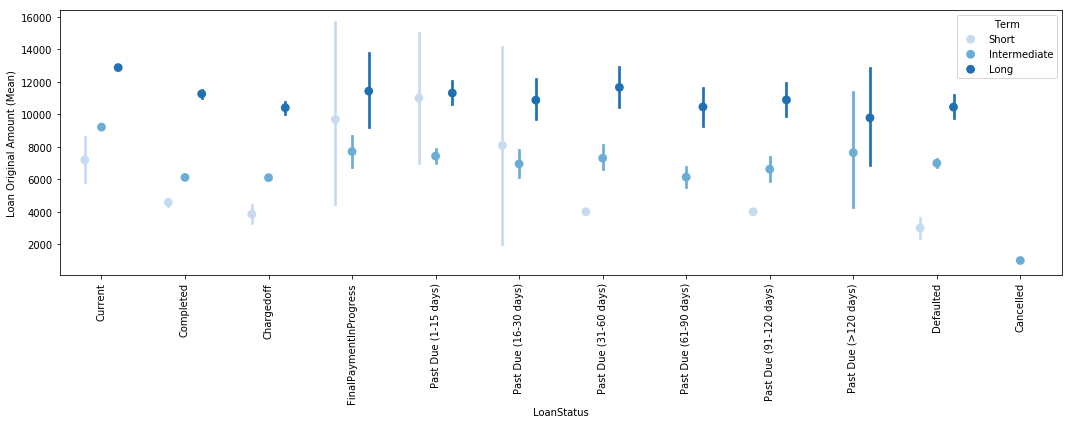

In [70]:
fig, ax = plt.subplots(ncols = 1 ,figsize=[15,6])

sb.pointplot(data = df_loans, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=ordr,
             palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax)
ax.set_ylabel('Loan Original Amount (Mean)')
ax.set_yticklabels([],minor = True)
ax.set_xticklabels(ordr,rotation = 90)

plt.tight_layout()
plt.show();

> From the above we can see that across most loan status groups, the loan original amount is highest for long term loans and lowest for short term loans 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the dodge point graph of the credit score, BorrowerRate and LoanTerm we saw that across all credit score groups, the Long term loans have the highest BorrowerRate while the BorrowerRate is lowest in each credit score group when the loan term is short. This seems logical since from our earlier bivariate visualizations we found that the excellent credit score group had the lowest BorrowerRate compared to the high borrowerRates in Poor credit score group and the short loan terms had lower borrowrates compared to long loan terms .

>From the dodge point graph of Loan Original Amount, Loan status and Loan Term, we can see that When the loan is of high amount, the borrowers will opt for the 5 year long term plan instead of short teem or intermediate loan terms. When the borrower is taking a loan of low amount, the loan term is short  

### Were there any interesting or surprising interactions between features?

> From the heatmap, I was surprised that there was not much correlation between the DTI Ratio and the BorrowRate, BorrowerAPR and LenderYield.

## Conclusions
>In conclusion the BorrowerRate as we have seen is affected by factors such as Creditscore, Loan Term, DebttoIncome Ratio and EmploymentStatus duration. These can be important when analyzing whether a borrower should be given a loan or they are a high risk. 
